In [12]:
# import libaries

import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


# Import Training Data

In [2]:
df = pd.read_csv("cleaned_30kundersampling.csv", sep = ",")
df = df.iloc[: , 1:]
df.dropna(inplace=True)
df_labels = df[["toxic", "severe_toxic"]]

df.dropna(inplace=True)
df

,id,comment_text,severe_toxic,toxic,cleaned_text,count
0,c436fcdd4acc928a,naw i am fine see you later guys you rock ) ha...,0,0,nope fine see later guy rock hahahahaha userbi...,44
1,17bb9f8b0e2ff008,LOL\r\n\r\nREDDIT PWN YOU LMAO. UnknownTales1,0,0,lol reddit pwn lmao unknowntales,28
2,e86ae38d7ff0c1ff,You jumped the gun a bit too early - that's my...,0,0,jump gun bit early first revert hour,30
3,cb1fcb465bd93930,"No way, Mercedez PWNZ!!",0,0,way mercedez pwnz,15
4,140cb8dc1570e423,I noticed it doesn't mention if the real Presi...,0,0,notice mention real president shot,30
...,...,...,...,...,...,...
30583,fef4cf7ba0012866,"""\r\n\r\n our previous conversation \r\n\r\nyo...",0,1,previous conversation fuck shit eating liberal...,804
30584,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,0,1,mischievious pubic hair,21
30585,ffa33d3122b599d6,Your absurd edits \r\n\r\nYour absurd edits on...,0,1,absurd edits absurd edit great white shark tot...,178
30586,ffb47123b2d82762,"""\r\n\r\nHey listen don't you ever!!!! Delete ...",0,1,hey listen ever delete edits ever annoy wwe k ...,213


# Import Test Data

In [3]:
test = pd.read_csv("dataset/test_cleaned_14k.csv", sep = ",")
test = test.iloc[: , 1:]
test.dropna(inplace=True)
test['toxic'] = ""
test['severe_toxic'] = ""

test.dropna(inplace=True)
test

,comment_text,cleaned_text,count,toxic,severe_toxic
0,""" \r\n : ) No charge. Happy I was there to cat...",charge happy catch,16,,
1,==Thanks== \r\n For cleaning up the wp in wa i...,thanks clean wp wa issue,20,,
2,Why are people keen to act upon their whims an...,people keen act upon whim put spoiler rather s...,283,,
3,This Artist is FAKE! \r\n\r\n * \r\n\r\n htt...,artist fake person shallow heartless quick tur...,226,,
4,""" \r\n\r\n == Come by the Talk Page == \r\n\r\...",come talk page hey bb come talk page redrafted...,159,,
...,...,...,...,...,...
13995,it is so gay!!!!!!!,gay,3,,
13996,==ISBN== \r\n Thanks fo rhe info. Had no idea...,isbn thanks fo rhe info idea copy usage page w...,51,,
13997,== Neutrality disputed == \r\n I added to sev...,neutrality dispute add several statement clear...,277,,
13998,"User:Gert7|Gert7]] 10:34,",usergert gert,12,,


# Predictions

Train-test split Naive Bayes predictions for toxic data

In [40]:
# how to define X and y (from the iris data) for use with a MODEL
X = df.cleaned_text
y = df.toxic

In [41]:
# SPlit into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training dataset: ", X_train.shape[0])
print("Test dataset: ", X_test.shape[0])

Training dataset:  24466
Test dataset:  6117


In [42]:
# Remove stopwords, and convert documents to token counts
count_vector = CountVectorizer(stop_words = 'english')
training_data = count_vector.fit_transform(X_train.values.astype('U'))
testing_data = count_vector.transform(X_test.values.astype('U'))

In [43]:
X_test

24675    know shit fuck talk real game cover real sorry...
18582    g suck ya jackass serious get life come quasih...
9136                                       knowin dah dork
13466    production company produce one film till date ...
17631    wendy get lose really everybody share bigoted ...
                               ...                        
3307                well make lifetime sentence learn read
5520     metric section wikipediawikiproject womenwomen...
13373    recent edits please cease add uncited inaccura...
27921    shut fuck kiss as bitchwhat fuck talk aboutwho...
20999    criticism jesusplucking eyeball outslavery jes...
Name: cleaned_text, Length: 6117, dtype: object

In [44]:
y_train

6632     0
13420    0
13608    0
5425     0
15268    0
        ..
29807    1
5394     0
861      0
15800    1
23659    1
Name: toxic, Length: 24466, dtype: int64

In [45]:
# Run Naive Bayes algorithm
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [46]:
# Predict a portion of training data
predictions_toxic = naive_bayes.predict(testing_data)
predictions_toxic

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

Train-test split Naive Bayes predictions for severe toxic data

In [26]:
# define independent and dependent variables
X = df.cleaned_text
y = df.severe_toxic

In [27]:
# Split the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training dataset: ", X_train.shape[0])
print("Test dataset: ", X_test.shape[0])

Training dataset:  21408
Test dataset:  9175


In [28]:
# remove stop words
count_vector = CountVectorizer(stop_words = 'english')
training_data = count_vector.fit_transform(X_train.values.astype('U'))
testing_data = count_vector.transform(X_test.values.astype('U'))

In [29]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [30]:
predictions_severe_toxic = naive_bayes.predict(testing_data)
predictions_severe_toxic

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Model Evaluation

Generate confusion matrix for toxic

In [20]:
from sklearn.metrics import confusion_matrix

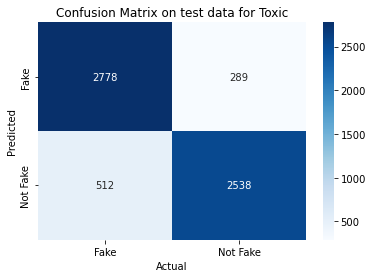

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# need to run Naive Bayes for *Toxic* before running confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, predictions_toxic) , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(cm,cmap= 'Blues', annot = True, fmt='', xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion Matrix on test data for Toxic')
plt.show()

In [22]:
conf_matrix_toxic = confusion_matrix(y_test, predictions_toxic)
print(conf_matrix_toxic)

[[2778  289]
 [ 512 2538]]


In [23]:
tn1 = conf_matrix_toxic[1][1]
fn1 = conf_matrix_toxic[0][1]
tp1 = conf_matrix_toxic[0][0]
fp1 = conf_matrix_toxic[1][0]

In [24]:
accuracy =  (tp1 + tn1)/(tp1 + tn1 + fp1 + fn1) 
precision = (tp1/(tp1+fp1)) 
recall = (tp1/(tp1+fn1)) 
f1_score = 2* ((recall * precision) / (precision+recall))

In [25]:
print("NB Result (toxic rows)")
print("Accuracy:", round(accuracy,5))
print("Precision" , round(precision,5))
print("Recall" ,round(recall,5))
print("F1 Score" , round(f1_score,5))

NB Result (toxic rows)
Accuracy: 0.86905
Precision 0.84438
Recall 0.90577
F1 Score 0.874


Generate confusion matrix for severe toxic

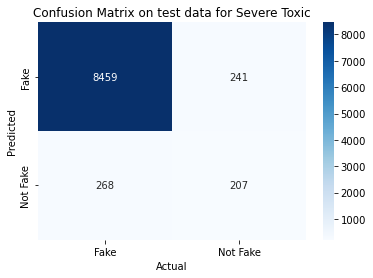

In [39]:
# need to run Naive Bayes for *Severe Toxic* before running confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, predictions_severe_toxic) , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(cm,cmap= 'Blues', annot = True, fmt='', xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion Matrix on test data for Severe Toxic')
plt.show()

In [32]:
conf_matrix_severe_toxic = confusion_matrix(y_test, predictions_severe_toxic)
print(conf_matrix_severe_toxic)

[[8459  241]
 [ 268  207]]


In [33]:
tn2 = conf_matrix_severe_toxic[1][1]
fn2 = conf_matrix_severe_toxic[0][1]
tp2 = conf_matrix_severe_toxic[0][0]
fp2 = conf_matrix_severe_toxic[1][0]

In [34]:
accuracy =  (tp2 + tn2)/(tp2 + tn2 + fp2 + fn2) 
precision = (tp2/(tp2+fp2)) 
recall = (tp2/(tp2+fn2)) 
f1_score = 2* ((recall * precision) / (precision+recall))

In [35]:
print("NB Result (severe toxic rows)")
print("Accuracy:", round(accuracy,5))
print("Precision" , round(precision,5))
print("Recall" ,round(recall,5))
print("F1 Score" , round(f1_score,5))

NB Result (severe toxic rows)
Accuracy: 0.94452
Precision 0.96929
Recall 0.9723
F1 Score 0.97079


Calculate average accuracy, precision, recall and F1 score 

In [36]:
accuracy =  ((tp1 + tn1)/(tp1 + tn1 + fp1 + fn1) +  (tp2 + tn2)/(tp2 + tn2 + fp2 + fn2))/2
accuracy

0.9067883091700932

In [37]:
precision = ((tp1/(tp1+fp1)) + (tp2/(tp2+fp2)))/2
recall = ((tp1/(tp1+fn1)) + (tp2/(tp2+fn2)))/2
f1_score = 2* ((recall * precision) / (precision+recall))

In [38]:
print("NB Result (Overall)")
print("Accuracy:", round(accuracy,5))
print("Precision" , round(precision,5))
print("Recall" ,round(recall,5))
print("F1 Score" , round(f1_score,5))

NB Result (Overall)
Accuracy: 0.90679
Precision 0.90683
Recall 0.93903
F1 Score 0.92265


# Predicting 14k test data

Predict Toxic Rows

In [47]:
X_train = df['cleaned_text']
y_train = df['toxic']
X_test = test['cleaned_text']
y_test = test['toxic']


print("Training dataset: ", X_train.shape[0])
print("Test dataset: ", X_test.shape[0])

Training dataset:  30583
Test dataset:  13899


In [48]:
count_vector = CountVectorizer(stop_words = 'english')
training_data = count_vector.fit_transform(X_train.values.astype('U'))
testing_data = count_vector.transform(X_test.values.astype('U'))

In [49]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [50]:
predictions_toxic_test = naive_bayes.predict(testing_data)
predictions_toxic_test

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [53]:
predictions_df['Predicted_toxic'] = predictions_toxic_test.tolist()
if 'toxic' in predictions_df.columns:
    predictions_df.drop(columns=['toxic'],inplace=True)
predictions_df

,comment_text,cleaned_text,count,severe_toxic,Predicted_toxic
0,""" \r\n : ) No charge. Happy I was there to cat...",charge happy catch,16,,0
1,==Thanks== \r\n For cleaning up the wp in wa i...,thanks clean wp wa issue,20,,0
2,Why are people keen to act upon their whims an...,people keen act upon whim put spoiler rather s...,283,,0
3,This Artist is FAKE! \r\n\r\n * \r\n\r\n htt...,artist fake person shallow heartless quick tur...,226,,0
4,""" \r\n\r\n == Come by the Talk Page == \r\n\r\...",come talk page hey bb come talk page redrafted...,159,,0
...,...,...,...,...,...
13995,it is so gay!!!!!!!,gay,3,,1
13996,==ISBN== \r\n Thanks fo rhe info. Had no idea...,isbn thanks fo rhe info idea copy usage page w...,51,,0
13997,== Neutrality disputed == \r\n I added to sev...,neutrality dispute add several statement clear...,277,,0
13998,"User:Gert7|Gert7]] 10:34,",usergert gert,12,,1


Predict Severe Toxic Rows

In [54]:
X_train = df['cleaned_text']
y_train = df['severe_toxic']
X_test = test['cleaned_text']
y_test = test['severe_toxic']


print("Training dataset: ", X_train.shape[0])
print("Test dataset: ", X_test.shape[0])

Training dataset:  30583
Test dataset:  13899


In [55]:
count_vector = CountVectorizer(stop_words = 'english')
training_data = count_vector.fit_transform(X_train.values.astype('U'))
testing_data = count_vector.transform(X_test.values.astype('U'))

In [56]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [33]:
predictions_test = naive_bayes.predict(testing_data)
predictions_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
# Add predictions to dataframe
predictions_df['Predicted_severe_toxic'] = predictions_test.tolist()
if 'severe_toxic' in predictions_df.columns:
    predictions_df.drop(columns=['severe_toxic'],inplace=True)
predictions_df

,comment_text,cleaned_text,count,Predicted_toxic,Predicted_severe_toxic
0,""" \r\n : ) No charge. Happy I was there to cat...",charge happy catch,16,0,0
1,==Thanks== \r\n For cleaning up the wp in wa i...,thanks clean wp wa issue,20,0,0
2,Why are people keen to act upon their whims an...,people keen act upon whim put spoiler rather s...,283,0,0
3,This Artist is FAKE! \r\n\r\n * \r\n\r\n htt...,artist fake person shallow heartless quick tur...,226,0,0
4,""" \r\n\r\n == Come by the Talk Page == \r\n\r\...",come talk page hey bb come talk page redrafted...,159,0,0
...,...,...,...,...,...
13995,it is so gay!!!!!!!,gay,3,1,0
13996,==ISBN== \r\n Thanks fo rhe info. Had no idea...,isbn thanks fo rhe info idea copy usage page w...,51,0,0
13997,== Neutrality disputed == \r\n I added to sev...,neutrality dispute add several statement clear...,277,0,0
13998,"User:Gert7|Gert7]] 10:34,",usergert gert,12,1,0


In [123]:
count = (predictions_df['Predicted_toxic'] == 1).sum()
print("toxic count: " ,count)

count1 = (predictions_df['Predicted_severe_toxic'] == 1).sum()
print("severe-toxic count: " ,count1)

toxic count:  4157
severe-toxic count:  322


In [125]:
# Write to csv
predictions_df.to_csv('Predictions/NaiveBayesPredictions.csv',index=False)

In [6]:
df_split = pd.read_csv("Predictions/NaiveBayesPredictions.csv", sep = ",")
df_split = df_split.iloc[: , 1:]
df_split.dropna(inplace=True)
# df_labels = df[["toxic", "severe_toxic"]]

df_split.dropna(inplace=True)
df_split

,cleaned_text,count,Predicted_toxic,Predicted_severe_toxic
0,charge happy catch,16,0,0
1,thanks clean wp wa issue,20,0,0
2,people keen act upon whim put spoiler rather s...,283,0,0
3,artist fake person shallow heartless quick tur...,226,0,0
4,come talk page hey bb come talk page redrafted...,159,0,0
...,...,...,...,...
13894,gay,3,1,0
13895,isbn thanks fo rhe info idea copy usage page w...,51,0,0
13896,neutrality dispute add several statement clear...,277,0,0
13897,usergert gert,12,1,0


In [9]:
df_severetoxic= df_split.drop(['Predicted_toxic'], axis=1)

In [10]:
df_severetoxic.to_csv('Predictions/NaiveBayes_SevereToxicPredictions.csv',index=False)

In [11]:
df_toxic= df_split.drop(['Predicted_severe_toxic'], axis=1)

In [12]:
df_toxic.to_csv('Predictions/NaiveBayes_ToxicPredictions.csv',index=False)